In [1]:
import pandas as pd
import numpy as np
import glob
from resampling import time_resampling


import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
###### Aplicação da Função para resampling da base de dados, deixando em formato horário. #################
###### Arquivo da Função: resampling.py
###########################################################################################################
df0= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2010.csv','1D')
df1= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2011.csv','1D')
df2= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2012.csv','1D')
df3= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2013.csv','1D')
df4= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2014.csv','1D')
df5= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2015.csv','1D')
df6= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2016.csv','1D')
df7= time_resampling('C:/Users/gusta/Google Drive/dados_desafio/2017.csv','1D')
#########################################################################,'1D'###################################

In [3]:
##### Concatenando as bases anuais para formação da série temporal. 
df= pd.concat([df0,df1,df2,df3,df4,df5,df6,df7],axis=0)
df

,entries,exits
time,,
2010-04-17,5.812548e+10,4.953496e+10
2010-04-18,7.077174e+10,6.115159e+10
2010-04-19,7.382511e+10,6.349756e+10
2010-04-20,7.234986e+10,6.115444e+10
2010-04-21,7.054381e+10,6.185858e+10
...,...,...
2017-09-19,1.117203e+12,8.926680e+11
2017-09-20,1.134720e+12,9.066210e+11
2017-09-21,1.144419e+12,9.201752e+11


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2717 entries, 2010-04-17 to 2017-09-23
Freq: D
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   entries  2717 non-null   float64
 1   exits    2717 non-null   float64
dtypes: float64(2)
memory usage: 63.7 KB


In [5]:
df.describe()

,entries,exits
count,2.717000e+03,2.717000e+03
mean,4.320449e+11,3.454457e+11
std,4.013090e+11,3.217753e+11
min,0.000000e+00,0.000000e+00
25%,7.991038e+10,6.898809e+10
50%,1.785344e+11,1.350708e+11
75%,8.978455e+11,7.349952e+11
max,1.260766e+12,1.073072e+12


In [6]:
df['entries']=df['entries'].mask(df['entries'] == 0).ffill(downcast='infer')

In [7]:
df.shape

(2717, 2)

In [8]:
df[['entries']].describe()

,entries
count,2.717000e+03
mean,4.320978e+11
std,4.012528e+11
min,1.189887e+10
25%,7.991038e+10
50%,1.785344e+11
75%,8.978455e+11
max,1.260766e+12


In [10]:
series=df[['entries']]
series= series.head(series.shape[0]-1) ## excluindo o dia 2017-09-23  que possui dados inconpletos

In [67]:
#Dividindo a série em treino e teste cronologicamente  
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(series,test_size=0.2, shuffle=False)

In [13]:
X_train

,entries
time,
2010-04-17,58125484211
2010-04-18,70771741591
2010-04-19,73825114476
2010-04-20,72349860551
2010-04-21,70543813803
...,...
2016-03-23,935642581538
2016-03-24,1009783737113
2016-03-25,929797166570


In [27]:
# Como a série é visivelmente não estacionária, vamos usar d =1
import pmdarima
arima_model = pmdarima.arima.auto_arima(X_train, start_p =1, d=1 , start_q=1 ,
                         max_p=5, max_d=5, max_q=5, start_P=0,
                        D =1, start_Q = 0, max_P=5, max_D=5 ,
                        max_Q=5, m= 12, seasonal= True,
                        error_action= 'warn',trace = True,
                        supress_warnings= True, stepwise=True, random_state=101, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=110041.229, Time=0.64 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=110144.954, Time=0.11 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=109393.726, Time=1.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=110070.383, Time=0.26 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=109180.480, Time=4.09 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=109063.545, Time=8.86 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=109031.211, Time=15.75 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=109020.340, Time=49.60 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=143.46 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=43.59 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=108731.295, Time=41.23 sec
 ARIMA(0,1,0)(4,1,0)[12]             : AIC=108749.736, Time=11.66 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=inf, Time=139.86 sec
 ARIMA(0,1

In [28]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 2172
Model:             SARIMAX(0, 1, 0)x(5, 1, 0, 12)   Log Likelihood              -54359.648
Date:                            Thu, 26 Aug 2021   AIC                         108731.295
Time:                                    11:12:29   BIC                         108765.360
Sample:                                         0   HQIC                        108743.755
                                           - 2172                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.9615      0.011    -90.340      0.000      -0.982      -0.941
ar.S.L24      -0.7650      0.015    -49.527      0.000      -0.795      -0.735
ar.S.L36      -0.5752      0.017    -34.486      0.000      -0.608      -0.543
ar.S.L48      -0.3365      0.017    -19.631      0.000      -0.370      -0.303
ar.S.L60      -0.1173      0.015     -8.045      0.000      -0.146      -0.089
sigma2      4.398e+20   5.21e-23   8.45e+42      0.000     4.4e+20     4.4e+20
===================================================================================
Ljung-Box (L1) (Q):                 105.68   Jarque-Bera (JB):            395638.85
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              60.01   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        69.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.38e+57. Standard errors may be unstable.
"""

In [72]:
# Função fornecida na documentação do pmdarima para previsão dia a dia na validação
from sklearn.metrics import mean_squared_error
from pmdarima.metrics import smape

model = arima_model  # seeded from the model we've already fit

def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (
        fc.tolist()[0],
        np.asarray(conf_int).tolist()[0])

forecasts = []
confidence_intervals = []

for new_ob in X_test['entries']:
    fc, conf = forecast_one_step()
    forecasts.append(fc)
    confidence_intervals.append(conf)

    # Updates the existing model with a small number of MLE steps
    model.update(new_ob)
    print(fc)

print(f"Mean squared error: {mean_squared_error(X_test['entries'], forecasts)}")
print(f"SMAPE: {smape(X_test['entries'], forecasts)}")

1014189487403.1255
990830370261.8342
939699565740.9089
965804543035.9971
960592972921.804
972964060501.9775
935857825972.0074
969657946774.154
940801560506.6798
986908063274.6768
980840273973.1948
997838244741.3024
965047070817.3569
963457080626.9283
945006074346.6035
1008202906650.7104
961068531176.9509
985886736832.8176
953512939111.8751
974529825461.8081
947119275762.8176
983200027951.7935
1010769369822.701
967782348306.752
936692560265.8118
943124573811.7471
918418964641.0594
966205997522.5376
912812032728.6678
998627259731.411
955931402536.7136
963555092210.8488
940541652803.1163
1016156696399.6449
958563310732.7019
956390590157.2358
977283145669.2639
989564476562.8739
960784407864.5411
993018901202.5532
952773062679.4473
959302990241.0044
952412687253.8743
975853327057.4609
1025297653036.8474
1016184231500.5452
975697649125.8652
981106220991.4075
965347234502.84
962049892925.3789
997596747260.216
1004495244654.3059
964974258678.776
1019138977832.8615
938279583182.147
104356721612

1080749834145.8512
1116781319331.665
1103351094901.136
1092275622503.7113
1108674846576.173
1100050850276.5234
1107895070186.1956
1090360026928.4645
1074319548385.9844
1085288457684.8972
1121614912020.667
1087656474318.0522
1100986147169.611
1085960108307.4336
1100417050966.221
1094314864238.5907
1093183023090.0133
1091541061791.7292
1128844323817.4902
1129572206773.7227
1067246898066.9586
1074728502352.8948
1103602883380.3442
1088513103204.09
1105799137035.7861
1091781516520.7717
1085108822317.1052
1092663016657.9692
1086956206499.6571
1095481010059.2964
1118498032665.6438
1088418428839.7354
1082642930491.7229
1111691446901.7056
1098535285088.7913
1089375736280.3098
1123128956132.7322
1108275123919.728
1167870838657.8767
1091411278248.793
1188475104577.8823
1095193984295.4587
1098556097178.2008
1133374089777.7136
1166485012594.6511
1177880745590.7083
1094446806360.1326
1134984940086.476
1103757712118.2847
1094456177798.9004
1082044723622.7767
1107052392187.3137
1094299220975.3145
1113

In [74]:
X_test['Pred']=forecasts

<AxesSubplot:xlabel='time'>

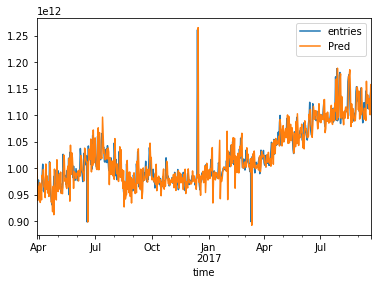

In [76]:
X_test.plot()

#  O auto arima apresentou um mape maior que o SVM, porém um MSE melhor (menor).

In [88]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MAPE: ',mean_absolute_percentage_error(X_test['entries'],X_test['Pred'])*100)
print('R2: ',r2_score(X_test['entries'],X_test['Pred']))
print('MSE: ',mean_squared_error(X_test['entries'],X_test['Pred']))

MAPE:  2.0135796214745394
R2:  0.6483745625217783
MSE:  1.029709170594164e+21


In [83]:
X_test.to_csv('auto_arima_pred.csv')

In [84]:
X_test

,entries,Pred
time,,
2016-03-28,980026538046,1.014189e+12
2016-03-29,945525393213,9.908304e+11
2016-03-30,945342101406,9.396996e+11
2016-03-31,978240804938,9.658045e+11
2016-04-01,963404131175,9.605930e+11
...,...,...
2017-09-18,1125043689981,1.111653e+12
2017-09-19,1117203099412,1.131338e+12
2017-09-20,1134719631864,1.100904e+12


In [85]:
Table=X_test
Table['Mov_true']=Table['entries']-Table['entries'].shift()
Table['Mov_Pred']=Table['Pred']- Table['entries'].shift()

Table['Mov_true']  = np.where(Table['Mov_true']>0, 1, 0)
Table['Mov_Pred']  = np.where(Table['Mov_Pred']>0, 1, 0)

from sklearn.metrics import classification_report
print(classification_report(Table['Mov_true'], Table['Mov_Pred']))

              precision    recall  f1-score   support

           0       0.51      0.48      0.49       283
           1       0.47      0.50      0.48       261

    accuracy                           0.49       544
   macro avg       0.49      0.49      0.49       544
weighted avg       0.49      0.49      0.49       544



O acerto de direção na previsão do arima também foi menor em relação ao SVM. Em relação a LSTM os erros MAPE E MSE foram menores, porém o acerto de direção foi pior.  